In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [115]:
sns.set_style('whitegrid')
sns.set_palette('hls', 8)

In [3]:
def print_head(f, size=1):
    with open(f) as read_file:
        print([next(read_file) for _ in range(size)])

In [4]:
print_head('review.json')

['{"review_id":"VfBHSwC5Vz_pbFluy07i9Q","user_id":"cjpdDjZyprfyDG3RlkVG3w","business_id":"uYHaNptLzDLoV_JZ_MuzUA","stars":5,"date":"2016-07-12","text":"My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\\n\\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbrellas f

In [5]:
print_head('business.json')

['{"business_id": "YDf95gJZaq05wvo7hTQbbQ", "name": "Richmond Town Square", "neighborhood": "", "address": "691 Richmond Rd", "city": "Richmond Heights", "state": "OH", "postal_code": "44143", "latitude": 41.5417162, "longitude": -81.4931165, "stars": 2.0, "review_count": 17, "is_open": 1, "attributes": {"RestaurantsPriceRange2": 2, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "BikeParking": true, "WheelchairAccessible": true}, "categories": ["Shopping", "Shopping Centers"], "hours": {"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}}\n']


In [6]:
def get_file_size(f):
    line_count = 0
    with open(f, 'r') as read_file:
        return sum(1 for _ in read_file)

In [7]:
print('Total number of businesses:', get_file_size('business.json'))
print('Total number of reviews', get_file_size('review.json'))

Total number of businesses: 156639
Total number of reviews 4736897


## Load Data 

In [43]:
def extract_data(f):
    with open(f, 'r') as read_file:
        for _ in read_file:
            yield json.loads(_)

In [44]:
business_df = pd.io.json.json_normalize(list(extract_data('business.json')))

In [47]:
business_df.shape

(156639, 101)

In [52]:
business_df.head(3)

,address,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:00-21:00,1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,NaN,NaN,NaN,False,False,False,False,False,False,...,10:00-22:00,0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:00-19:00,0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [118]:
list(business_df.columns)

['address',
 'attributes.AcceptsInsurance',
 'attributes.AgesAllowed',
 'attributes.Alcohol',
 'attributes.Ambience.casual',
 'attributes.Ambience.classy',
 'attributes.Ambience.divey',
 'attributes.Ambience.hipster',
 'attributes.Ambience.intimate',
 'attributes.Ambience.romantic',
 'attributes.Ambience.touristy',
 'attributes.Ambience.trendy',
 'attributes.Ambience.upscale',
 'attributes.BYOB',
 'attributes.BYOBCorkage',
 'attributes.BestNights.friday',
 'attributes.BestNights.monday',
 'attributes.BestNights.saturday',
 'attributes.BestNights.sunday',
 'attributes.BestNights.thursday',
 'attributes.BestNights.tuesday',
 'attributes.BestNights.wednesday',
 'attributes.BikeParking',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.BusinessParking.garage',
 'attributes.BusinessParking.lot',
 'attributes.BusinessParking.street',
 'attributes.BusinessParking.valet',
 'attributes.BusinessParking.validated',
 'attributes.ByAppointmentOnly',
 'att

In [78]:
#edit city
def audit_cities(row):
    city_map = json.loads(open('businessEdits.json', 'r').read())
    for k in city_map:
        if k in row:
            return row.replace(k, city_map[k])
    return row

In [72]:
business_df['city'] = business_df['city'].str.lower().str.strip()
business_df['city'] = business_df['city'].apply(audit_cities)

In [95]:
business_df['state'] = business_df['state'].str.lower().str.strip()

In [128]:
business_df.head(3)

,address,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:00-21:00,1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,oh
1,2824 Milton Rd,NaN,NaN,NaN,False,False,False,False,False,False,...,10:00-22:00,0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,nc
2,337 Danforth Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:00-19:00,0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,on


## Business Data 

### Cities and States 

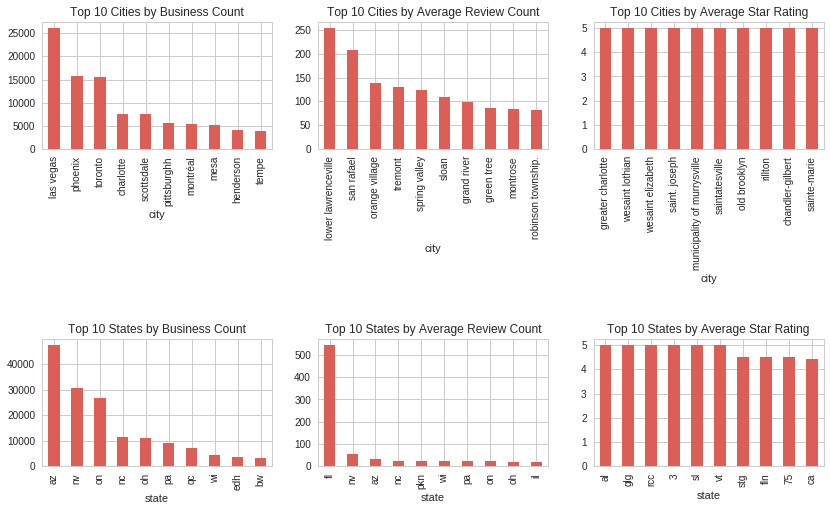

In [116]:
plt.figure(figsize=(14, 14))
#top 10 cities by business count
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
business_df['city'].value_counts().iloc[:10].plot.bar(ax=ax1, title='Top 10 Cities by Business Count')
plt.xlabel('city')
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
#top 10 cities by avg. review count
business_df.groupby('city').review_count.mean().sort_values(ascending=False)[:10]\
    .plot.bar(ax=ax2, title='Top 10 Cities by Average Review Count')
#top 10 cities by avg. star rating
ax3 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
business_df.groupby('city').stars.mean().sort_values(ascending=False)[:10]\
    .plot.bar(ax=ax3, title='Top 10 Cities by Average Star Rating')
#top 10 states by business count
ax4 = plt.subplot2grid((3, 3), (1, 0), colspan=1)
business_df['state'].value_counts().iloc[:10].plot.bar(ax=ax4, title='Top 10 States by Business Count')
plt.xlabel('state')
#top 10 states by avg. review count
ax5 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
business_df.groupby('state').review_count.mean().sort_values(ascending=False)[:10]\
    .plot.bar(ax=ax5, title='Top 10 States by Average Review Count')
#top 10 states by avg. star rating
ax6 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
business_df.groupby('state').stars.mean().sort_values(ascending=False)[:10]\
    .plot.bar(ax=ax6, title='Top 10 States by Average Star Rating')
plt.subplots_adjust(hspace=1.5)

In [155]:
category_df = pd.concat([business_df[['city', 'state']], 
                         pd.DataFrame(business_df.categories.values.tolist())], axis=1)
melted_category_df = category_df.melt(id_vars=['city', 'state'], 
                 value_vars=list(filter(lambda x: x not in ['city', 'state'], category_df.columns)), 
                value_name='category')
melted_category_df = melted_category_df[~melted_category_df.category.isnull()]

city
las vegas      1069
phoenix         989
scottsdale      896
charlotte       821
mesa            817
tempe           791
toronto         779
henderson       776
pittsburghh     761
chandler        729
Name: category, dtype: int64

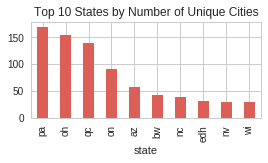

In [157]:
plt.figure(figsize=(14, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
# top 10 states by number of unique cities
business_df.groupby('state').city.nunique().sort_values(ascending=False)[:10]\
    .plot.bar(ax=ax1, title='Top 10 States by Number of Unique Cities')
# top 10 cities by unique category count
melted_category_df.groupby('city').category.nunique().sort_values(ascending=False)[:10]

In [9]:
def make_count_df(f, key, columns):
    data = extract_data(f)
    counts = Counter([json.loads(x).get(key).lower().strip() for x in data])
    return pd.DataFrame(list(counts.items()), columns=columns)

In [11]:
city_counts = make_count_df('business.json', 'city', columns=['City', 'Business Count'])
state_counts = make_count_df('business.json', 'state', columns=['State', 'Business Count'])

In [12]:
cities = [(json.loads(x).get('city').lower().strip(), json.loads(x).get('state').lower().strip()) 
          for x in extract_data('business.json')]
df = pd.DataFrame(cities, columns=['City', 'State'])

In [13]:
df['City'] = df['City'].map(lambda x: replacement_dict.get(x) if replacement_dict.get(x) else x)

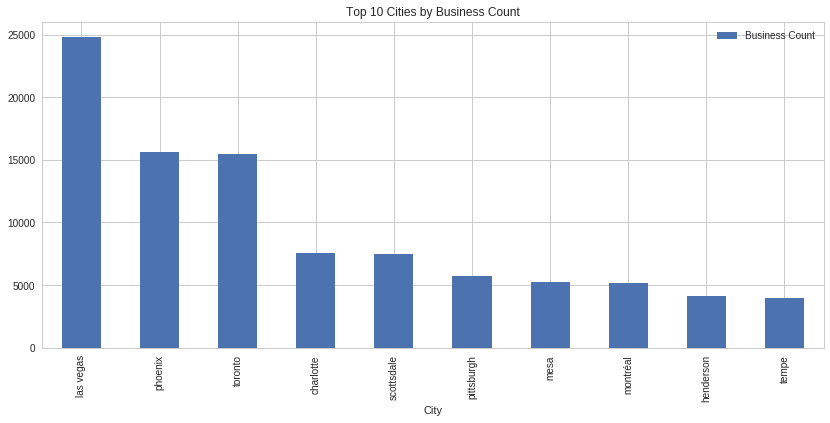

In [14]:
top_10_cities = city_counts.sort_values(by='Business Count', ascending=False).iloc[:10]
top_10_cities.plot.bar('City', 'Business Count', figsize=(14, 6))
plt.title('Top 10 Cities by Business Count');

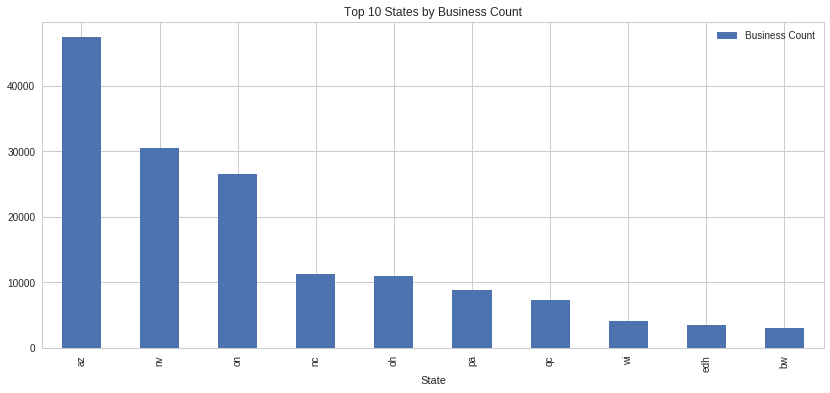

In [15]:
top_10_states = state_counts.sort_values(by='Business Count', ascending=False).iloc[:10]
top_10_states.plot.bar('State', 'Business Count', figsize=(14, 6))
plt.title('Top 10 States by Business Count');

### Star Ratings

In [16]:
review_counts = Counter([json.loads(x).get('stars') for x in extract_data('business.json')])

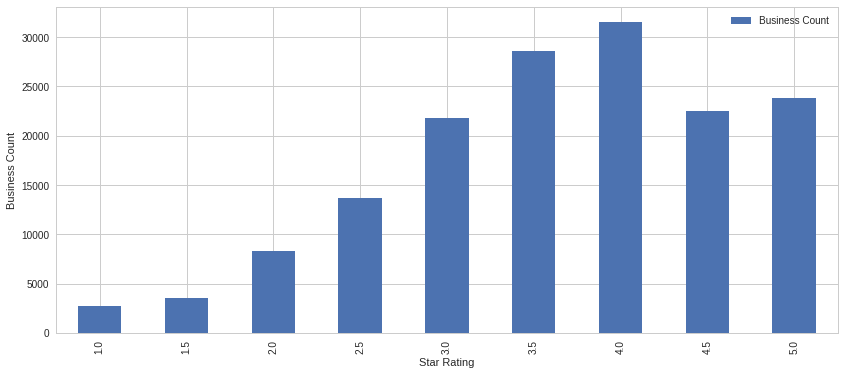

In [17]:
pd.DataFrame(list(review_counts.items()), columns=['Star Rating', 'Business Count'])\
    .sort_values(by='Star Rating')\
    .plot.bar('Star Rating', 'Business Count', figsize=(14, 6))
plt.ylabel('Business Count')
plt.title('');

### Business Categories 

In [18]:
categories = pd.DataFrame({'Category': [b.lower().strip() for x in extract_data('business.json') 
              for b in json.loads(x).get('categories')]})

In [19]:
categories.describe()

,Category
count,590290
unique,1240
top,restaurants
freq,51613


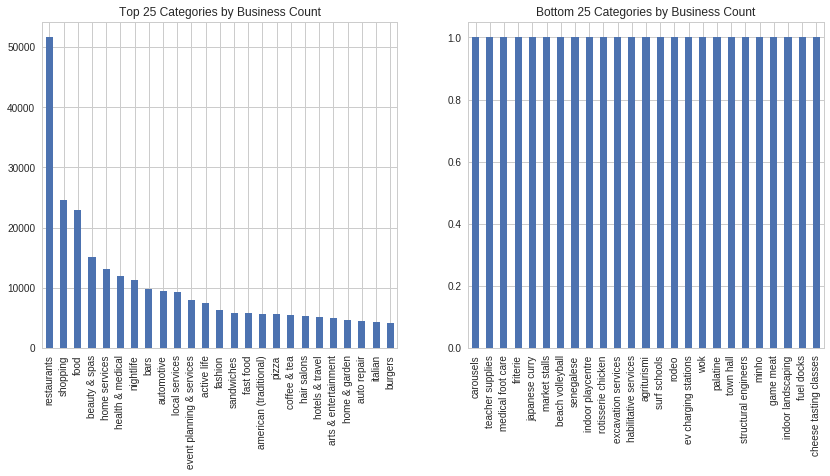

In [20]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
categories['Category'].value_counts()[:25].plot.bar(ax=ax1, title='Top 25 Categories by Business Count')
categories['Category'].value_counts()[::-1][:25].plot.bar(ax=ax2, title='Bottom 25 Categories by Business Count');

### Review Counts 

In [21]:
review_counts = pd.DataFrame({'Review Count': [json.loads(r).get('review_count') for r in extract_data('business.json')]})

In [22]:
review_counts.describe()

,Review Count
count,156639.000000
mean,30.238159
std,96.486631
min,3.000000
25%,4.000000
50%,9.000000
75%,23.000000
max,6979.000000


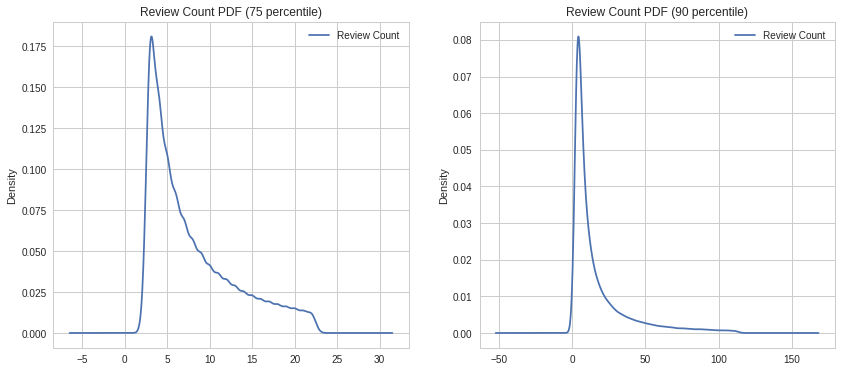

In [23]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
review_counts[review_counts['Review Count'] < review_counts['Review Count'].quantile(.75)]\
    .plot.density(title='Review Count PDF (75 percentile)', ax=ax1)
review_counts[review_counts['Review Count'] < review_counts['Review Count'].quantile(.95)]\
    .plot.density(title='Review Count PDF (90 percentile)', ax=ax2);

### Price Ranges 

In [24]:
price_ranges = pd.DataFrame({'Price Range': [json.loads(x).get('attributes').get('RestaurantsPriceRange2')
                                             for x in extract_data('business.json')]}, dtype='category')

In [25]:
price_ranges.describe()

,Price Range
count,96355
unique,4
top,2
freq,54138


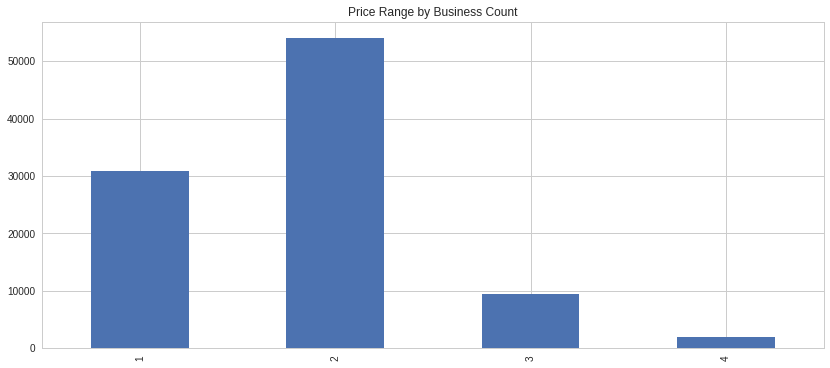

In [26]:
price_ranges['Price Range']\
    .value_counts().sort_values()\
    .reindex([1, 2, 3, 4])\
    .plot.bar(figsize=(14, 6), title='Price Range by Business Count');

### Days Open 

In [27]:
days_open = pd.DataFrame({'Days Open': [i for x in extract_data('business.json') 
                                        for i in json.loads(x).get('hours').keys()]})

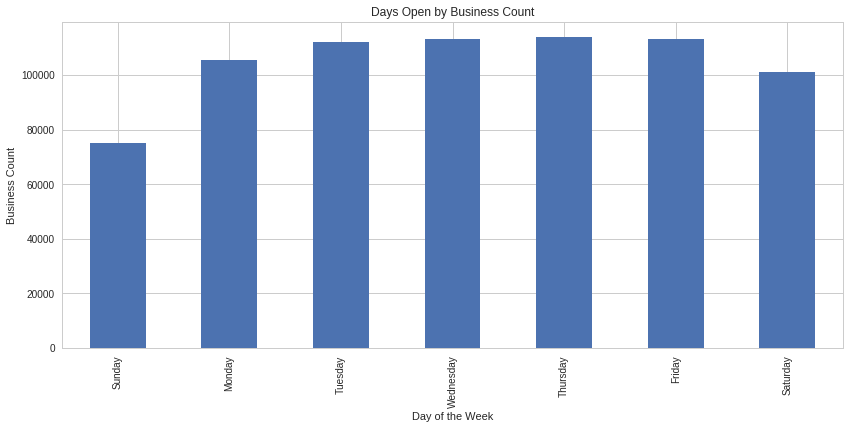

In [28]:
days_open['Days Open']\
    .value_counts()\
    .sort_values()\
    .reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])\
    .plot.bar(title='Days Open by Business Count', figsize=(14, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Business Count');

### Parking 

In [29]:
parking = [json.loads(x).get('attributes').get('BusinessParking') 
           for x in extract_data('business.json')
           if json.loads(x).get('attributes').get('BusinessParking')
          ]

In [30]:
parking_df = pd.DataFrame(parking)
parking_df.describe()

,garage,lot,street,valet,validated
count,89439,89439,89439,89439,87221
unique,2,2,2,2,2
top,False,False,False,False,False
freq,84489,54467,72763,87780,86781


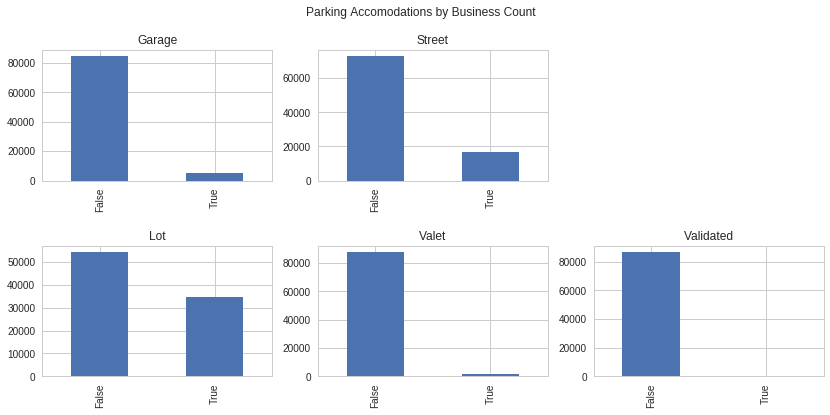

In [31]:
plt.figure(figsize=(14, 6))
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
parking_df['garage'].value_counts().plot.bar(ax=ax1, title='Garage')
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
parking_df['lot'].value_counts().plot.bar(ax=ax2, title='Lot')
ax3 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
parking_df['street'].value_counts().plot.bar(ax=ax3, title='Street')
ax4 = plt.subplot2grid((2, 3), (1, 1), colspan=1)
parking_df['valet'].value_counts().plot.bar(ax=ax4, title='Valet')
ax5 = plt.subplot2grid((2, 3), (1, 2), colspan=1)
parking_df['validated'].value_counts().plot.bar(ax=ax5, title='Validated')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Parking Accomodations by Business Count');